### Clustering

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer 

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans



In [6]:
df = pd.read_excel("../customer.xlsx")
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [7]:
df.drop(columns="Cust_Number", inplace=True)
df.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,15000,18,44,0
1,15000,18,79,0
2,16000,23,8,1
3,16000,25,79,1
4,17000,32,41,1


In [8]:
df.isnull().sum()

Yearly_Income       0
Age                 0
Cust_Spend_Score    0
Sex                 0
dtype: int64

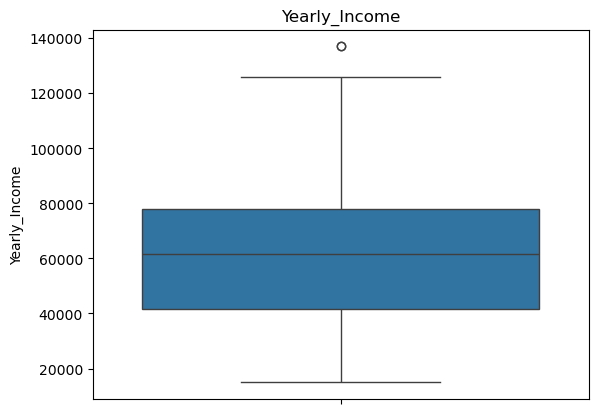

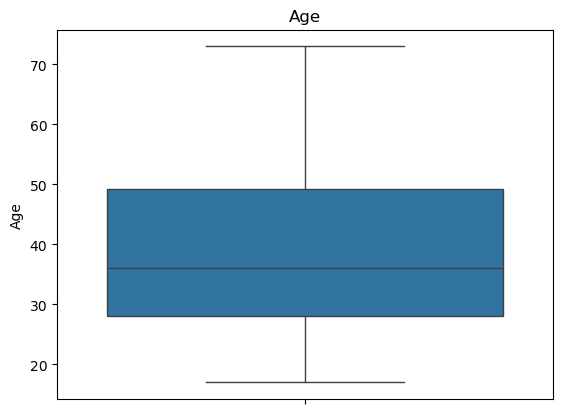

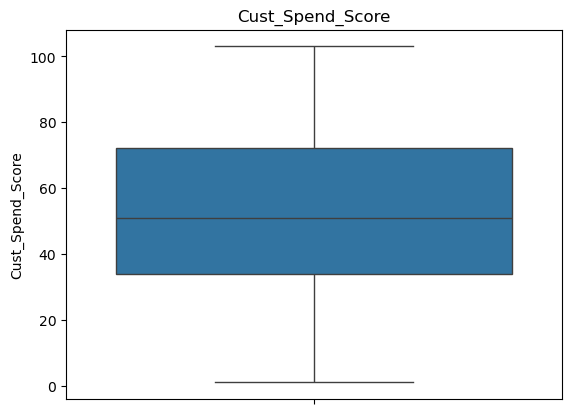

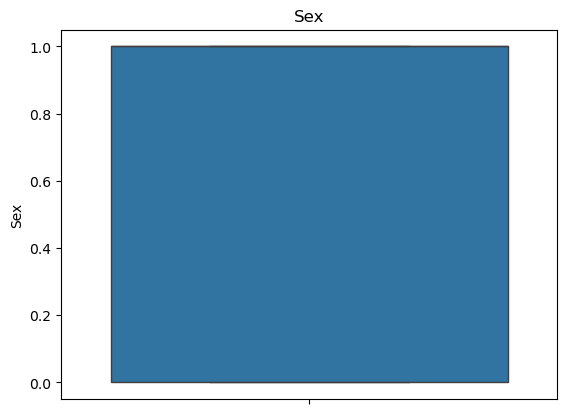

In [11]:
for col in df.columns:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

In [12]:
df1 = df[df["Yearly_Income"] <  130000]
df1.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,15000,18,44,0
1,15000,18,79,0
2,16000,23,8,1
3,16000,25,79,1
4,17000,32,41,1


In [14]:
df_sc = pd.DataFrame(StandardScaler().fit_transform(df1), columns=df1.columns)
df_sc.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,-1.779171,-1.503384,-0.283684,-1.141195
1,-1.779171,-1.503384,1.068399,-1.141195
2,-1.739447,-1.148593,-1.674398,0.876275
3,-1.739447,-1.006676,1.068399,0.876275
4,-1.699723,-0.509968,-0.399577,0.876275


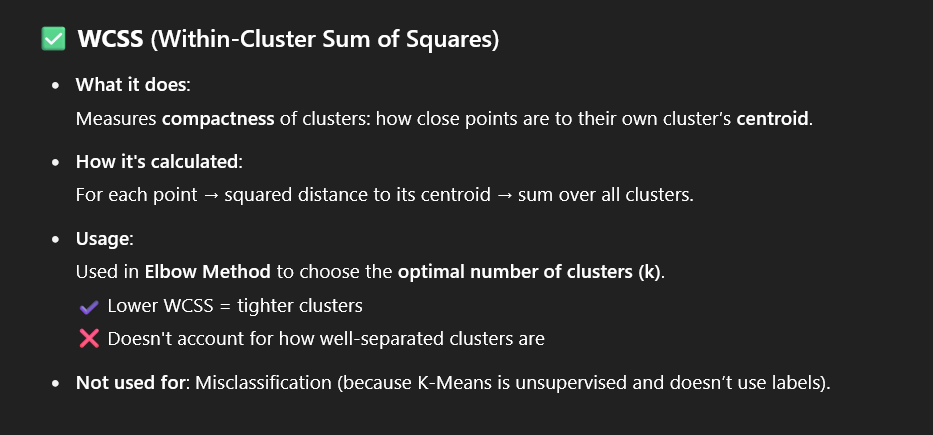

In [29]:
from os import environ
environ["OMP_NUM_THREADS"] = "1"
wcss =[]
for i in range(1, 20):
    km = KMeans(n_clusters=i)
    km.fit(df_sc[['Yearly_Income', 'Cust_Spend_Score']])
    wcss.append(km.inertia_)

wcss

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

[396.0,
 271.21832908272916,
 157.03341708022856,
 107.15541991919261,
 62.117260774567086,
 53.301258908591095,
 49.83146463991876,
 43.17963726639878,
 32.27077988678093,
 29.102985911643536,
 27.007246460182408,
 23.96163332264317,
 22.103792714682044,
 22.705732497904066,
 19.4276491873802,
 17.61659853240363,
 15.847116347185143,
 15.091409997081705,
 15.057337887468627]

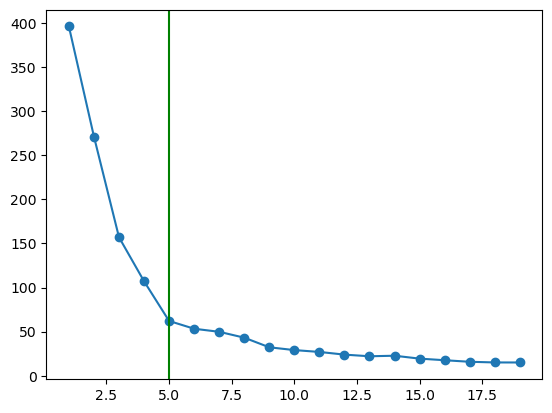

In [30]:
plt.plot(range(1,20), wcss, marker="o")
plt.axvline(x=5, c="green")
plt.show()

In [31]:
km = KMeans(n_clusters=5)
km.fit(df_sc[['Yearly_Income', 'Cust_Spend_Score']])


c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [32]:
km.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [33]:
km.cluster_centers_

array([[-0.20260946, -0.005541  ],
       [ 1.0379503 , -1.25267674],
       [ 1.0098993 ,  1.23512235],
       [-1.33011303, -1.12852583],
       [-1.37814418,  1.16957561]])

In [34]:
df_sc["labels"] = km.labels_

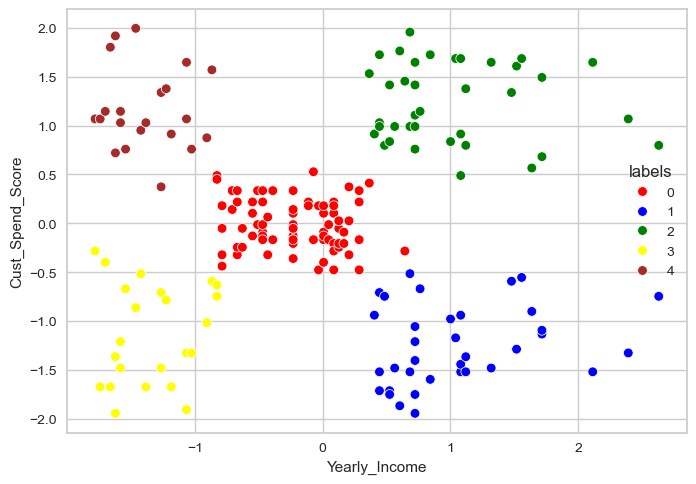

In [37]:
sns.scatterplot(x=df_sc['Yearly_Income'], y=df_sc['Cust_Spend_Score'], hue=df_sc['labels'], palette=['red','blue', 'green', 'yellow', 'brown'])
plt.show()

### Silhouette Score

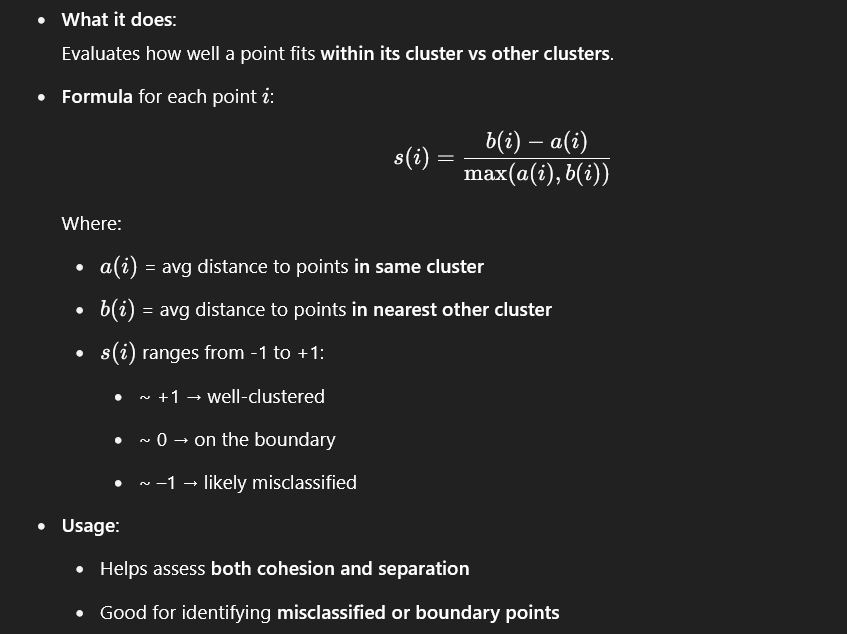

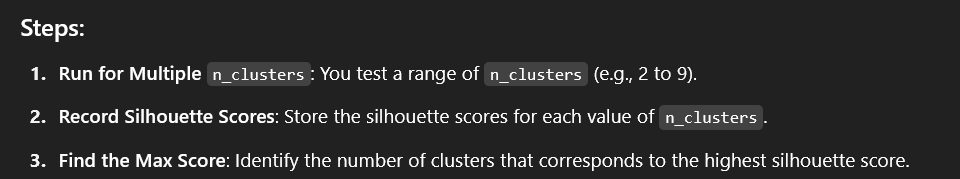

silhouette Score for 2 cluster is 0.29277518416758613


c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


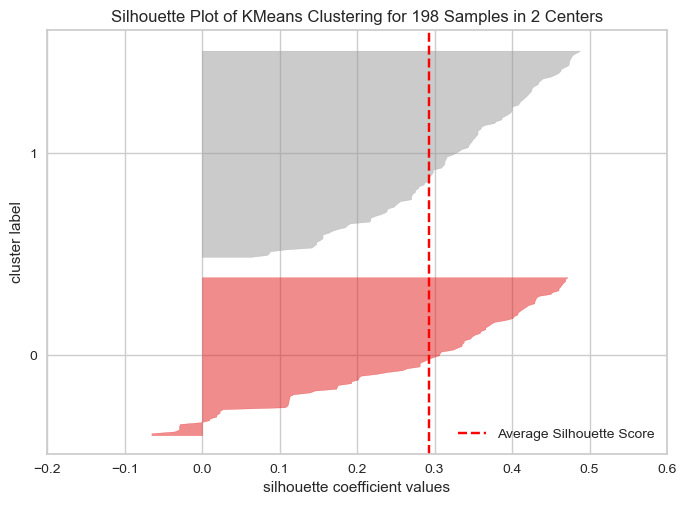

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 3 cluster is 0.4617052050469738


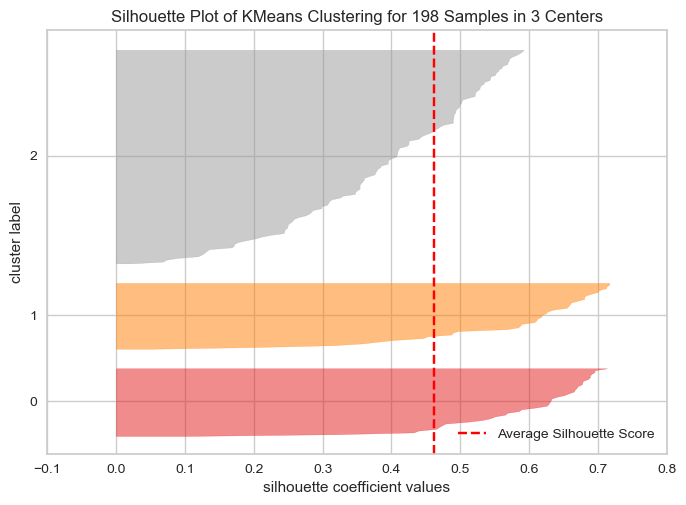

silhouette Score for 4 cluster is 0.4970326297186363


c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


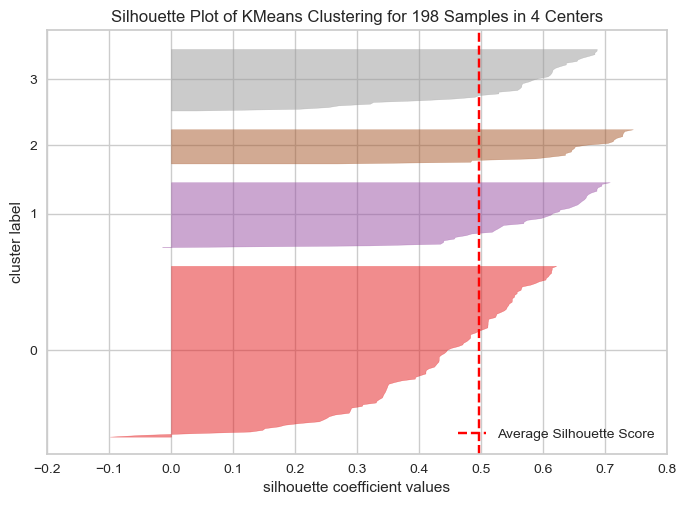

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 5 cluster is 0.5582289588979077


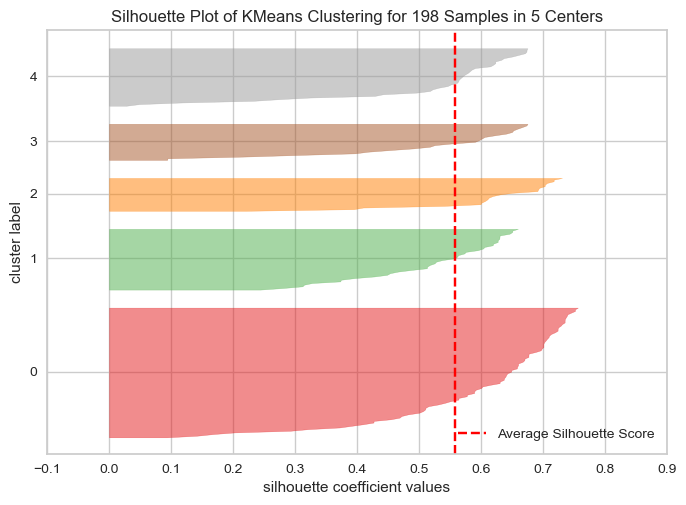

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 6 cluster is 0.538257145108287


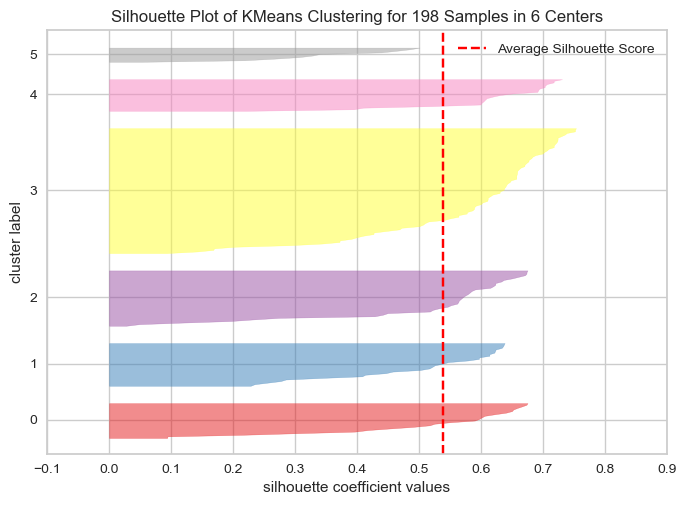

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 7 cluster is 0.455332087857128


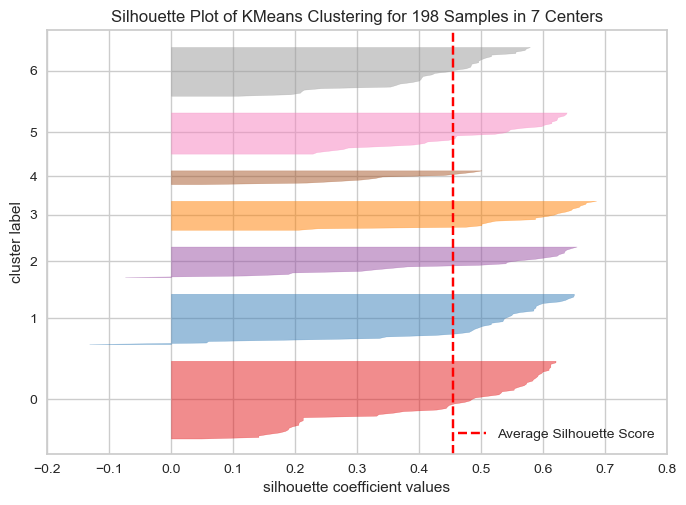

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 8 cluster is 0.4320020734951329


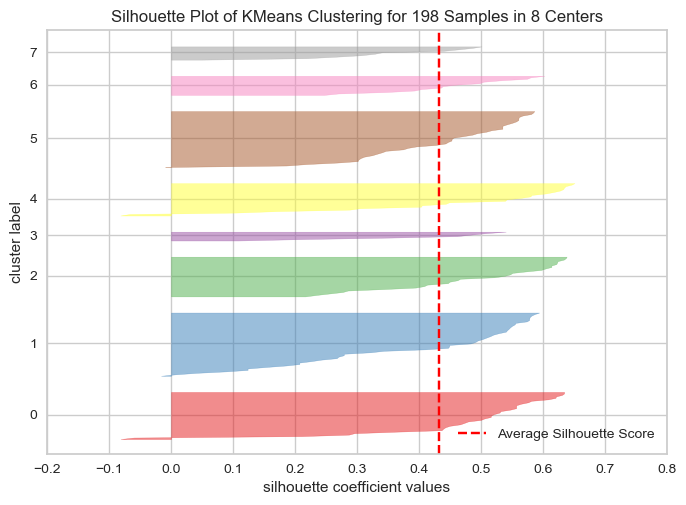

silhouette Score for 9 cluster is 0.41969048266564135


c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


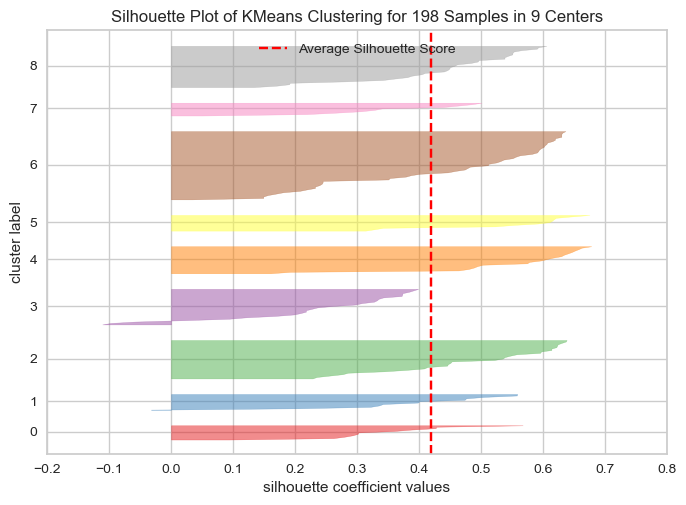

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 10 cluster is 0.44361571706866926


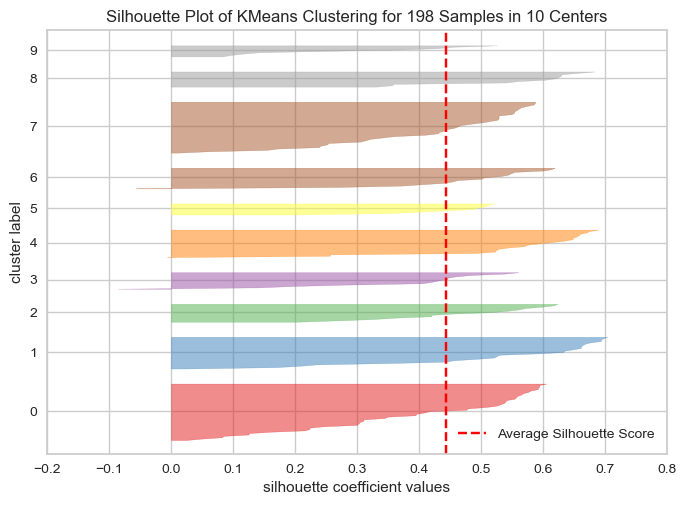

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 11 cluster is 0.4434850479712279


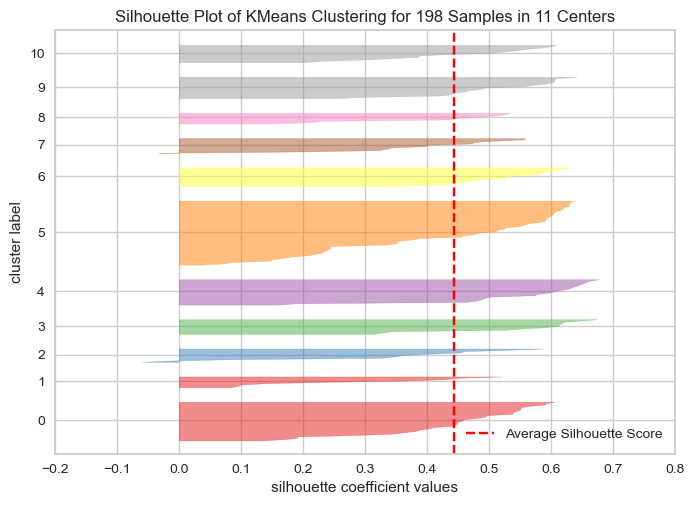

silhouette Score for 12 cluster is 0.41539350850098733


c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


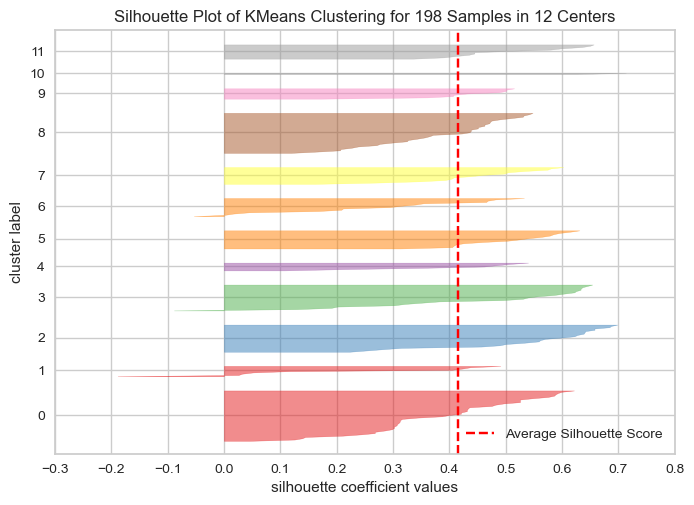

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 13 cluster is 0.41089044889529797


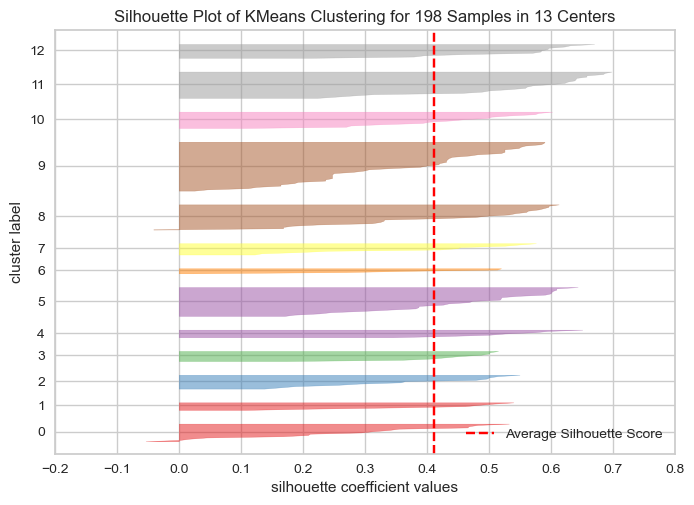

silhouette Score for 14 cluster is 0.4201257397136042


c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


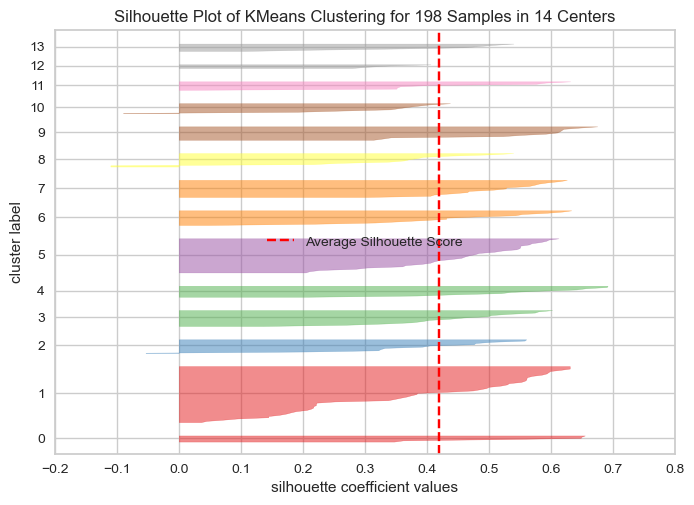

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 15 cluster is 0.3883353219303472


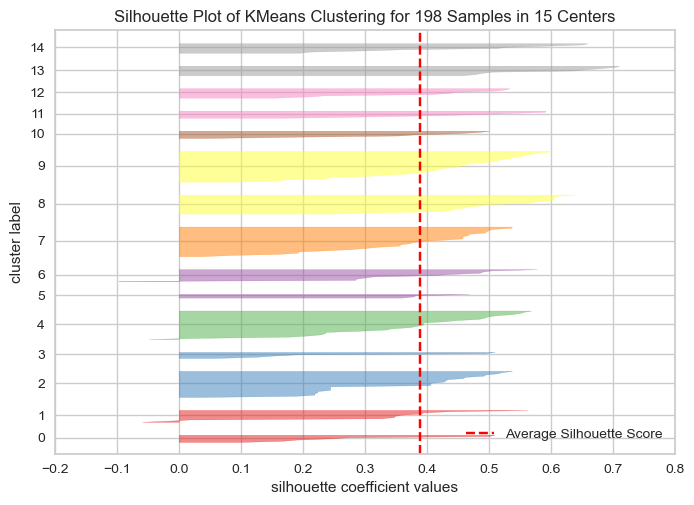

silhouette Score for 16 cluster is 0.4119095044200723


c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


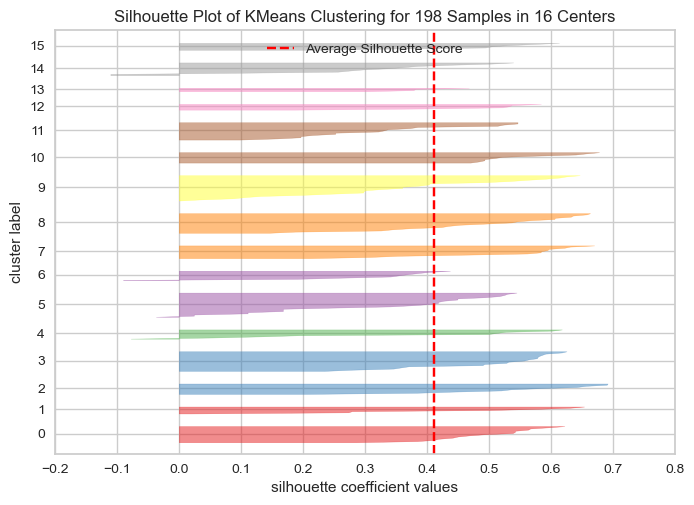

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 17 cluster is 0.36508608757196587


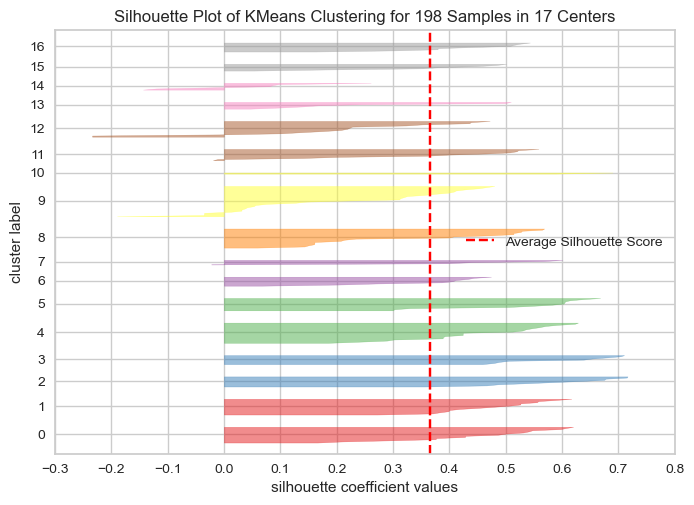

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 18 cluster is 0.39434688626071557


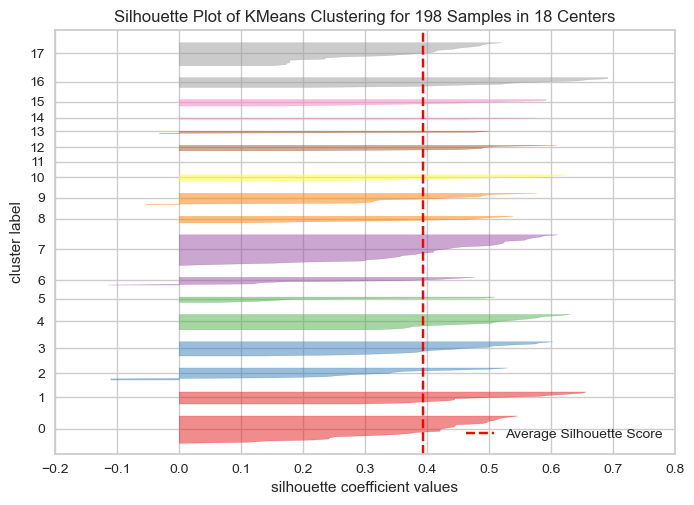

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


silhouette Score for 19 cluster is 0.4089179374151361


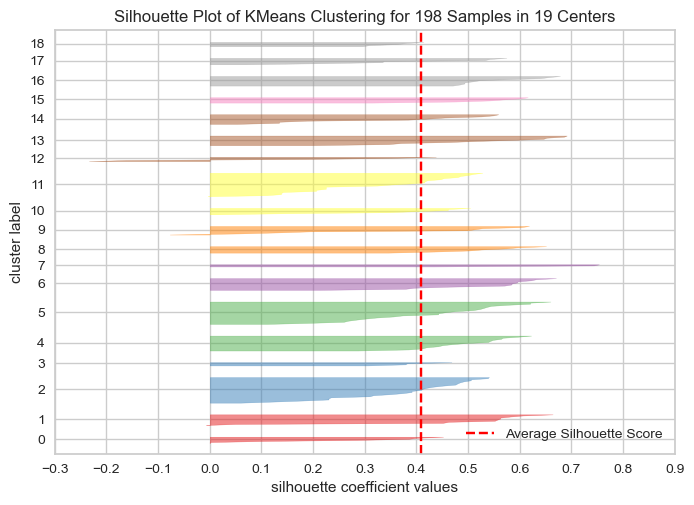

In [ ]:
for i in range(2, 20):
    km = KMeans(n_clusters=i)
    km.fit(df_sc[['Yearly_Income', 'Cust_Spend_Score']])
    sil_score = silhouette_score(df_sc[['Yearly_Income', 'Cust_Spend_Score']], km.labels_)
    print(f"silhouette Score for {i} cluster is {sil_score}")
    sil_v = SilhouetteVisualizer(km)
    sil_v.fit(df_sc[['Yearly_Income', 'Cust_Spend_Score']])
    sil_v.show()

In [39]:
df_sc[['Yearly_Income', 'Cust_Spend_Score']]

,Yearly_Income,Cust_Spend_Score
0,-1.779171,-0.283684
1,-1.779171,1.068399
2,-1.739447,-1.674398
3,-1.739447,1.068399
4,-1.699723,-0.399577
...,...,...
193,2.113819,1.647864
194,2.391890,-1.326719
195,2.391890,1.068399
196,2.630236,-0.747255
